## Home Easy Assesment Lead AI Engineer

### Using the Excel file as a reference, create a detailed video presentation outlining your approach to assisting a client in finding a home in Chicago

## Import Libraries

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## Load the Data

In [9]:
df =pd.read_excel("/content/Price_Drop (1) (1).xlsx")

## Data Exploration

In [10]:
df.head(5)

,building_id,name,unit_number,beds,baths,sqft,neighborhood_name,concession_title,updated_on,old_price,new_price,max_price,net_price,price_per_sqft,percentage_change,cooperate,concession_applied
0,1,1000 South Clark,2507,1,1.0,730,South Loop,1 Month Off Available on all unit types for a ...,2020-07-23 16:47:51.661,2268,2313,2918,2159,2.957,-26.01%,True,True
1,1,1000 South Clark,1615,1,1.0,765,South Loop,1 Month Off Available on all unit types for a ...,2020-08-01 19:46:25.883,2419,2467,2918,2303,3.010,-21.08%,True,True
2,1,1000 South Clark,1806,1,1.0,645,South Loop,1 Month Off Available on all unit types for a ...,2020-08-05 11:30:16.886,2158,2201,2918,2054,3.185,-29.61%,True,True
3,1,1000 South Clark,2717,1,1.0,710,South Loop,1 Month Off Available on all unit types for a ...,2020-08-01 11:33:52.353,2178,2181,2918,2036,2.867,-30.23%,True,True
4,1,1000 South Clark,1817,1,1.0,710,South Loop,1 Month Off Available on all unit types for a ...,2020-08-01 11:33:52.353,2088,2091,2918,1952,2.749,-33.10%,True,True


In [11]:
# Get basic information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3491 entries, 0 to 3490
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   building_id         3491 non-null   int64         
 1   name                3491 non-null   object        
 2   unit_number         3491 non-null   object        
 3   beds                3491 non-null   int64         
 4   baths               3491 non-null   float64       
 5   sqft                3491 non-null   int64         
 6   neighborhood_name   3467 non-null   object        
 7   concession_title    2586 non-null   object        
 8   updated_on          3491 non-null   datetime64[ns]
 9   old_price           3491 non-null   int64         
 10  new_price           3491 non-null   int64         
 11  max_price           3491 non-null   int64         
 12  net_price           3491 non-null   int64         
 13  price_per_sqft      3491 non-null   float64     

In [12]:
# Check for missing values
df.isnull().sum()

,0
building_id,0
name,0
unit_number,0
beds,0
baths,0
sqft,0
neighborhood_name,24
concession_title,905
updated_on,0
old_price,0


In [13]:
# Get descriptive statistics
df.describe()

,building_id,beds,baths,sqft,updated_on,old_price,new_price,max_price,net_price,price_per_sqft
count,3491.000000,3491.000000,3491.000000,3491.000000,3491,3491.000000,3491.000000,3491.000000,3491.000000,3491.000000
mean,1375.016328,1.014609,1.234890,800.947579,2020-08-04 17:06:51.030723072,2416.578058,2386.775423,2898.484675,2287.667144,2.878156
min,1.000000,0.000000,0.000000,229.000000,2019-11-26 16:40:22.280000,190.000000,919.000000,951.000000,919.000000,1.429000
25%,56.000000,0.000000,1.000000,608.000000,2020-08-02 11:24:15.393999872,1800.500000,1765.000000,2135.000000,1700.500000,2.483500
50%,103.000000,1.000000,1.000000,731.000000,2020-08-10 14:24:56.783000064,2175.000000,2150.000000,2608.000000,2053.000000,2.836000
75%,293.000000,1.000000,1.000000,896.000000,2020-08-12 10:17:23.664000,2682.500000,2655.500000,3100.000000,2544.000000,3.199000
max,6378.000000,4.000000,3.000000,3249.000000,2020-08-12 19:21:59.631000,18500.000000,13750.000000,18500.000000,13468.000000,5.861000
std,2431.614660,0.778702,0.480088,290.347891,NaN,1047.193880,1013.806034,1546.164906,966.565668,0.547228


In [14]:
df['neighborhood_name'].unique()

array(['South Loop', 'Old Town', 'The Loop', 'River North',
       'Streeterville', 'Fulton River District', 'Lincoln Park',
       'West Loop', 'Old town', 'New East Side', 'Gold Coast',
       'Lake View', 'River West', 'Logan Square', 'Bronzeville',
       'Near North Side', 'Uptown', 'Goose Island', 'Fulton Market',
       'Wicker Park', 'Ravenswood', 'Buena Park', 'Near South Side',
       'Edgewater Beach', 'Rogers Park', 'East Hyde Park', nan, 'Cragin',
       'Hyde Park'], dtype=object)

## Data CLeaning

In [15]:
# Fill or drop missing values in 'neighborhood_name' if necessary
df['neighborhood_name'].fillna('Unknown', inplace=True)

# Convert 'percentage_change' to numeric, if it contains string values
df['percentage_change'] = pd.to_numeric(df['percentage_change'], errors='coerce')


## Data Filtering

In [16]:
df['max_price'].max()

18500

In [17]:
max_price = 18500  # Set a budget
min_beds = 1
neighborhoods_of_interest = ['Lincoln Park', 'Lakeview']

# Filter the DataFrame
filtered_homes = df[
    (df['new_price'] <= max_price) &
    (df['beds'] >= min_beds) &
    (df['neighborhood_name'].isin(neighborhoods_of_interest))
]

# Display the filtered results
print(filtered_homes[['name', 'neighborhood_name', 'new_price', 'beds', 'baths']])


                      name neighborhood_name  new_price  beds  baths
403        Eugenie Terrace      Lincoln Park       2292     1    1.0
404        Eugenie Terrace      Lincoln Park       2310     1    1.0
405        Eugenie Terrace      Lincoln Park       2688     1    1.0
406        Eugenie Terrace      Lincoln Park       2289     1    1.0
407        Eugenie Terrace      Lincoln Park       2150     1    1.0
408        Eugenie Terrace      Lincoln Park       2565     1    1.0
409        Eugenie Terrace      Lincoln Park       2694     1    1.0
410        Eugenie Terrace      Lincoln Park       2561     1    1.0
411        Eugenie Terrace      Lincoln Park       3316     2    2.0
412        Eugenie Terrace      Lincoln Park       3372     2    2.0
413        Eugenie Terrace      Lincoln Park       3381     2    2.0
414        Eugenie Terrace      Lincoln Park       5929     2    2.5
415        Eugenie Terrace      Lincoln Park       7791     3    2.5
627   Park View Apartments      Li

In [18]:
# Calculate price per square foot
filtered_homes['price_per_sqft'] = filtered_homes['new_price'] / filtered_homes['sqft']

# Identify homes with significant price drops or concessions
significant_changes = filtered_homes[filtered_homes['percentage_change'] < -5]  # Example threshold
print(significant_changes[['name', 'old_price', 'new_price', 'percentage_change']])


Empty DataFrame
Columns: [name, old_price, new_price, percentage_change]
Index: []


<ipython-input-18-338ef83c3f73>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_homes['price_per_sqft'] = filtered_homes['new_price'] / filtered_homes['sqft']


## Visualization

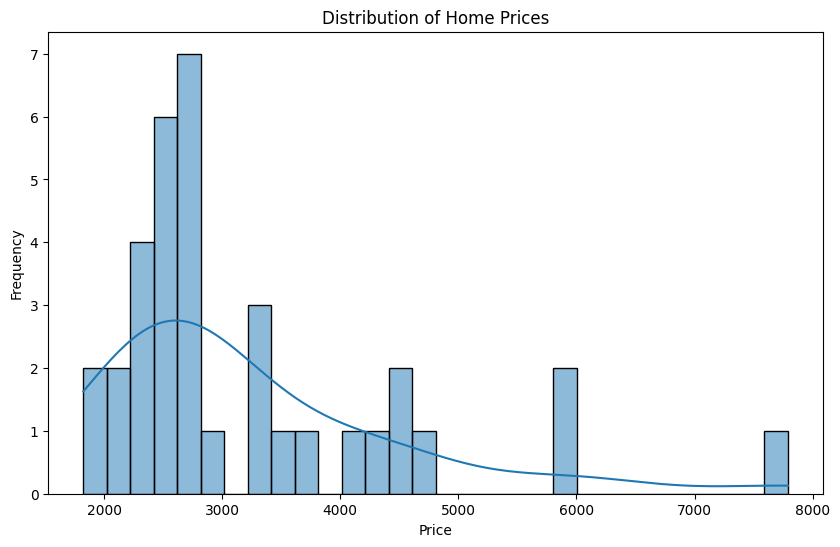

In [19]:
# Plot price distribution
plt.figure(figsize=(10, 6))
sns.histplot(filtered_homes['new_price'], bins=30, kde=True)
plt.title('Distribution of Home Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

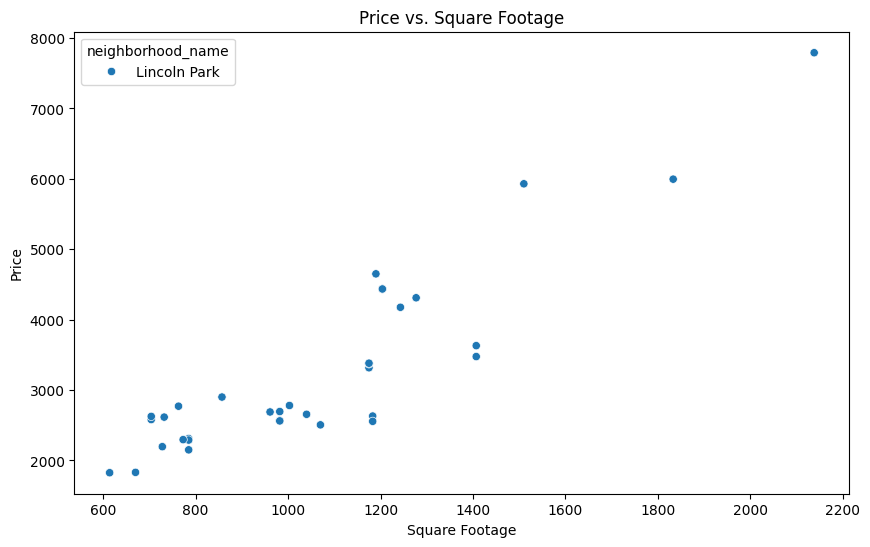

In [20]:
# Scatter plot for price vs. sqft
plt.figure(figsize=(10, 6))
sns.scatterplot(data=filtered_homes, x='sqft', y='new_price', hue='neighborhood_name')
plt.title('Price vs. Square Footage')
plt.xlabel('Square Footage')
plt.ylabel('Price')
plt.show()

## Results


In [21]:
recommendations = filtered_homes[['name', 'neighborhood_name', 'new_price', 'beds', 'baths']]
print("Recommended Homes:")
print(recommendations)

Recommended Homes:
                      name neighborhood_name  new_price  beds  baths
403        Eugenie Terrace      Lincoln Park       2292     1    1.0
404        Eugenie Terrace      Lincoln Park       2310     1    1.0
405        Eugenie Terrace      Lincoln Park       2688     1    1.0
406        Eugenie Terrace      Lincoln Park       2289     1    1.0
407        Eugenie Terrace      Lincoln Park       2150     1    1.0
408        Eugenie Terrace      Lincoln Park       2565     1    1.0
409        Eugenie Terrace      Lincoln Park       2694     1    1.0
410        Eugenie Terrace      Lincoln Park       2561     1    1.0
411        Eugenie Terrace      Lincoln Park       3316     2    2.0
412        Eugenie Terrace      Lincoln Park       3372     2    2.0
413        Eugenie Terrace      Lincoln Park       3381     2    2.0
414        Eugenie Terrace      Lincoln Park       5929     2    2.5
415        Eugenie Terrace      Lincoln Park       7791     3    2.5
627   Park View